In [3]:
import numpy as np
import matplotlib.pyplot as plt

Vary dataset size $N$, number of dimensions $D$ to do training and testing time and memory comparison for finding $K$ nearest neighbours.

In [1]:
#defining function to create dataset of size N and D dimensions
def create_dataset(N, D):
    X = np.random.randint(0, 10, (N, D))
    return X

In [5]:
# Exact 1NN from sklearn
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

In [6]:
def pairwise_dist_numpy(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.sqrt(np.sum((x - y)**2))

In [7]:
def pairwise_dist_numpy_norm(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

In [39]:
X = create_dataset(100, 2)
query_pt = np.array([7, 4])
X[indices], distances

(array([[[4, 3],
         [2, 1]]]),
 array([[2.        , 2.23606798]]))

In [40]:
# Find all distances from query_pt to all points in X using sklearn
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn)

[[0.         1.         1.         1.41421356 1.41421356 1.41421356
  1.41421356 2.         2.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798 2.82842712 2.82842712
  2.82842712 3.         3.         3.         3.         3.
  3.16227766 3.16227766 3.16227766 3.16227766 3.16227766 3.16227766
  3.16227766 3.16227766 3.16227766 3.60555128 3.60555128 3.60555128
  3.60555128 3.60555128 3.60555128 4.         4.         4.
  4.12310563 4.12310563 4.12310563 4.12310563 4.12310563 4.24264069
  4.24264069 4.47213595 4.47213595 4.47213595 5.         5.
  5.         5.         5.         5.         5.         5.
  5.         5.         5.         5.         5.09901951 5.09901951
  5.09901951 5.09901951 5.38516481 5.38516481 5.38516481 5.38516481
  5.38516481 5.65685425 5.83095189 5.83095189 5.83095189 5.83095189
  5.83095189 6.08276253 6.32455532 6.32455532 6.40312424 6.40312424
  6.40312424 6.70820393 6.70820393 7.         7.07106781 7.07106781
  7.07106781

In [41]:
distances_sklearn[0, idxs_sklearn[0]]

array([3.16227766, 4.        , 4.47213595, 3.60555128, 5.        ,
       5.83095189, 4.47213595, 3.16227766, 5.        , 6.70820393,
       4.12310563, 7.07106781, 3.16227766, 3.16227766, 7.07106781,
       3.        , 5.83095189, 5.09901951, 5.        , 4.47213595,
       1.41421356, 5.        , 3.60555128, 7.        , 7.21110255,
       4.12310563, 1.41421356, 5.65685425, 5.38516481, 5.09901951,
       2.82842712, 5.        , 5.        , 5.38516481, 2.23606798,
       5.        , 6.32455532, 4.24264069, 2.        , 0.        ,
       2.23606798, 1.        , 4.        , 5.        , 2.23606798,
       6.70820393, 4.24264069, 4.12310563, 2.23606798, 3.16227766,
       5.83095189, 2.        , 3.        , 5.38516481, 7.07106781,
       5.        , 3.        , 3.        , 5.        , 3.60555128,
       6.08276253, 7.28010989, 6.40312424, 5.        , 3.16227766,
       6.40312424, 8.60232527, 8.06225775, 3.60555128, 5.38516481,
       5.09901951, 7.07106781, 7.28010989, 5.83095189, 2.82842

In [42]:
import pandas as pd

df = pd.DataFrame(X, columns=['X1', 'X2'])
df["query_distance"] = distances_sklearn[0, idxs_sklearn[0]]
df

,X1,X2,query_distance
0,7,0,3.162278
1,7,8,4.000000
2,2,1,4.472136
3,4,3,3.605551
4,0,0,5.000000
...,...,...,...
95,2,2,2.236068
96,2,4,2.236068
97,2,5,1.414214
98,0,9,3.162278


In [43]:
### Random Projections

P = 3
np.random.seed(35)
R = np.random.randn(X.shape[1] + 1, P)  # why +1?

In [44]:
R

array([[-1.88973671, -0.41359218, -0.76602601],
       [-0.92412667, -1.42159783,  0.80525599],
       [ 1.14886176,  1.1694284 , -0.80200928]])

In [45]:
# For now, make R[:, 2] =1 to make it easier to plot
R[:, 2] = 1
R

array([[-1.88973671, -0.41359218,  1.        ],
       [-0.92412667, -1.42159783,  1.        ],
       [ 1.14886176,  1.1694284 ,  1.        ]])

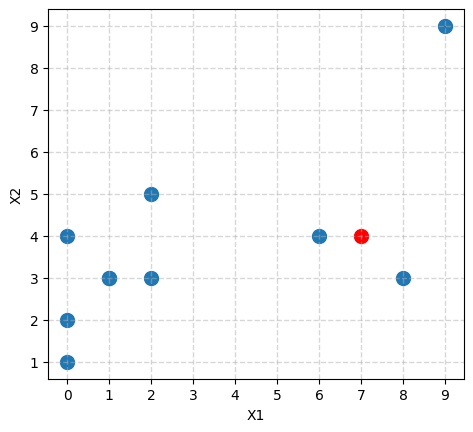

In [46]:

X = create_dataset(10, 2)



def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    

plot_dataset()




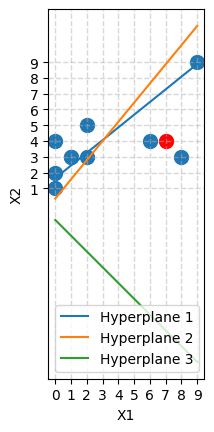

In [47]:
plot_dataset()

# Plot hyperplanes
for i in range(P):
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    x2 = (-R[0, i] - R[1, i]*x1) / R[2, i]
    plt.plot(x1, x2, label=f'Hyperplane {i+1}')
plt.legend()

In [48]:
X_aug = np.hstack([ np.ones((X.shape[0], 1)), X])
X_aug

array([[1., 0., 1.],
       [1., 9., 9.],
       [1., 0., 2.],
       [1., 2., 5.],
       [1., 8., 3.],
       [1., 0., 4.],
       [1., 1., 3.],
       [1., 6., 4.],
       [1., 2., 3.],
       [1., 1., 3.]])

In [49]:
X_aug @ R

array([[-0.74087495,  0.75583622,  2.        ],
       [ 0.13287914, -2.68311712, 19.        ],
       [ 0.40798681,  1.92526461,  3.        ],
       [ 2.00631876,  2.59035414,  8.        ],
       [-5.83616476, -8.27808967, 12.        ],
       [ 2.70571033,  4.26412141,  5.        ],
       [ 0.63272191,  1.67309518,  5.        ],
       [-2.83904967, -4.2654656 , 11.        ],
       [-0.29140476,  0.25149734,  6.        ],
       [ 0.63272191,  1.67309518,  5.        ]])

In [50]:
np.sign(X_aug @ R)

array([[-1.,  1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.]])

0.0
0.0
197.91015625


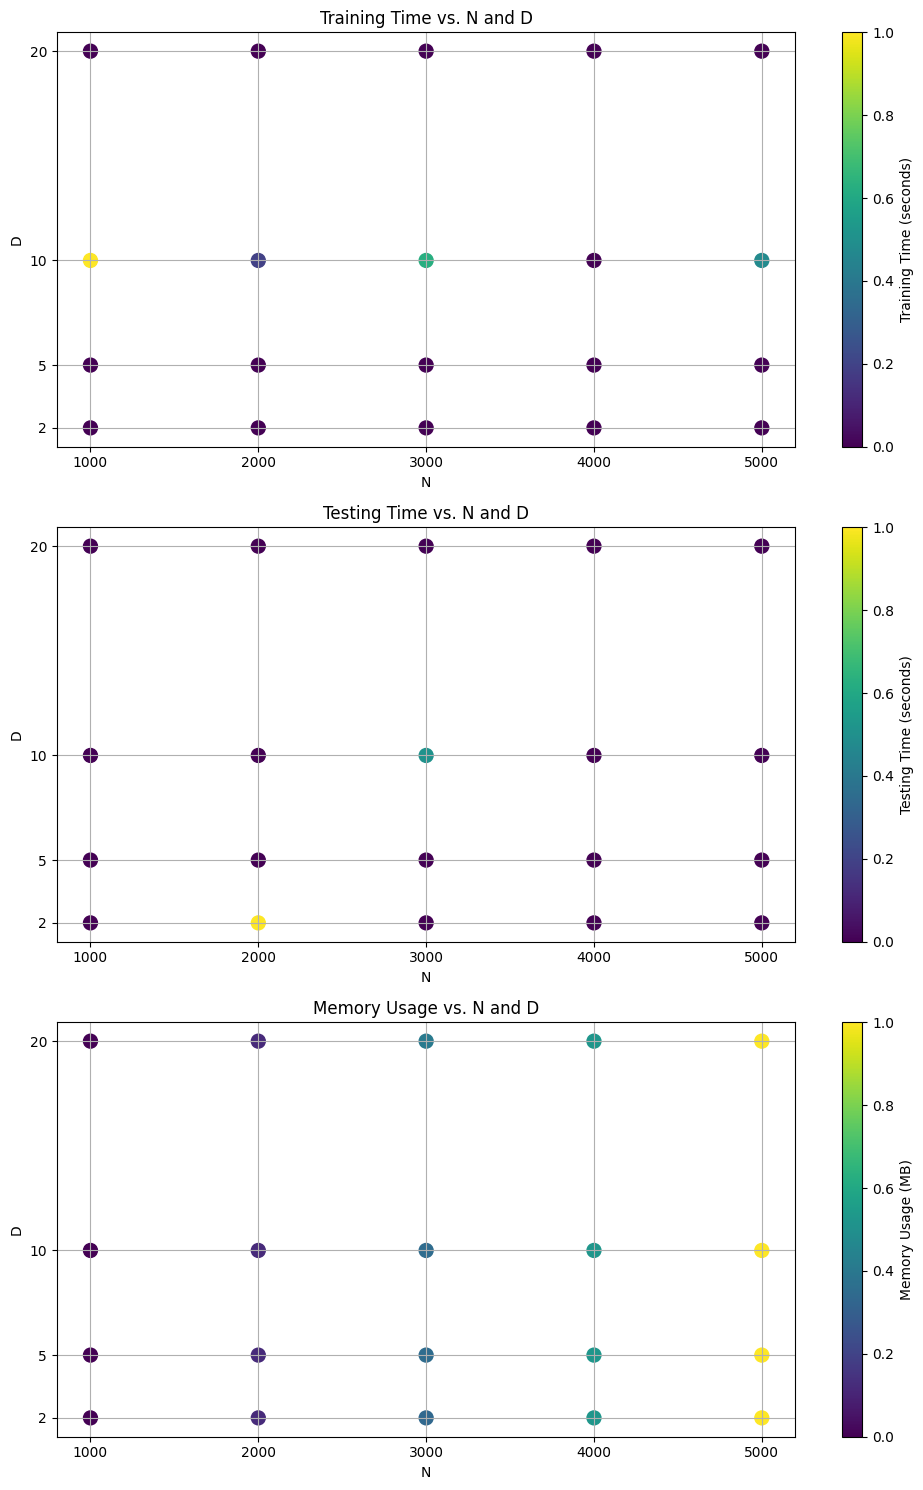

In [51]:
import time
import os
import psutil  # for memory usage
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

NMAX = [1000, 2000, 3000, 4000, 5000]
DMAX = [2, 5, 10, 20]
K = 5  # Number of nearest neighbors to find

training_times = []
testing_times = []
memory_usages = []

for i in NMAX:
    for j in DMAX:
        X = create_dataset(i, j)
        query_pt = np.random.randint(0, 10, (j))
        if X.shape[1] == 0:
            continue

        start_time = time.time()
        nbrs = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X)
        training_time = time.time() - start_time

        process = psutil.Process(os.getpid())
        memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB

        start_time = time.time()
        distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
        testing_time = time.time() - start_time

        training_times.append(training_time)
        testing_times.append(testing_time)
        memory_usages.append(memory_usage)
        
    

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot training time vs N and D
axs[0].scatter(np.repeat(NMAX, len(DMAX)), np.tile(DMAX, len(NMAX)), c=training_times, cmap='viridis', s=100)
axs[0].set_title('Training Time vs. N and D')
axs[0].set_xlabel('N')
axs[0].set_ylabel('D')
axs[0].set_xticks(NMAX)
axs[0].set_yticks(DMAX)
axs[0].grid(True)
fig.colorbar(axs[0].scatter([], [], c=[], cmap='viridis'), ax=axs[0], label='Training Time (seconds)')

# Plot testing time vs N and D
axs[1].scatter(np.repeat(NMAX, len(DMAX)), np.tile(DMAX, len(NMAX)), c=testing_times, cmap='viridis', s=100)
axs[1].set_title('Testing Time vs. N and D')
axs[1].set_xlabel('N')
axs[1].set_ylabel('D')
axs[1].set_xticks(NMAX)
axs[1].set_yticks(DMAX)
axs[1].grid(True)
fig.colorbar(axs[1].scatter([], [], c=[], cmap='viridis'), ax=axs[1], label='Testing Time (seconds)')

# Plot memory usage vs N and D
axs[2].scatter(np.repeat(NMAX, len(DMAX)), np.tile(DMAX, len(NMAX)), c=memory_usages, cmap='viridis', s=100)
axs[2].set_title('Memory Usage vs. N and D')
axs[2].set_xlabel('N')
axs[2].set_ylabel('D')
axs[2].set_xticks(NMAX)
axs[2].set_yticks(DMAX)
axs[2].grid(True)
fig.colorbar(axs[2].scatter([], [], c=[], cmap='viridis'), ax=axs[2], label='Memory Usage (MB)')

plt.tight_layout()
plt.show()


In [52]:
print(training_times)
print(testing_times)
print(memory_usages)

[0.0, 0.0, 0.012861251831054688, 0.0, 0.0, 0.0, 0.002506256103515625, 0.0, 0.0, 0.0, 0.008064746856689453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006078958511352539, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0013480186462402344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006806850433349609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[196.61328125, 196.61328125, 196.61328125, 196.61328125, 196.76953125, 196.76953125, 196.76953125, 196.76953125, 197.046875, 197.06640625, 197.06640625, 197.140625, 197.29296875, 197.296875, 197.296875, 197.296875, 197.91015625, 197.91015625, 197.91015625, 197.91015625]


#### LSH Implementation

In [24]:
rng = np.random.default_rng(0)

In [17]:
def plot_dataset(dataset, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[:, 0], dataset[:, 1], c='b', marker='o', label='Dataset')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
def plot_neighbors(dataset, neighbors_indices, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[:, 0], dataset[:, 1], c='b', marker='o', label='Dataset')
    for i, indices in enumerate(neighbors_indices):
        neighbors = dataset[indices]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], c='r', marker='x', label=f'Neighbors (K={len(indices)})' if i == 0 else None)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [22]:
def hamming_hash(data, hyperplanes):
    b = len(hyperplanes)
    hash_key = (data @ hyperplanes.T) >= 0
    dec_vals = np.array([2 ** i for i in range(b)], dtype=int)
    hash_key = hash_key @ dec_vals
    return hash_key

In [23]:
def locality_sensitive_hash(data, hyperplanes):
    hash_vals = hamming_hash(data, hyperplanes)
    hash_table = {}
    for i, v in enumerate(hash_vals):
        if v not in hash_table:
            hash_table[v] = set()
        hash_table[v].add(i)
    return hash_table

In [21]:
def generate_hyperplanes(data, bucket_size=16):
    m = data.shape[0]            # number of data points
    n = data.shape[1]            # number of features in a data point
    b = m // bucket_size         # desired number of hash buckets
    h = int(np.log2(b))          # desired number of hyperplanes
    H = rng.normal(size=(h, n))  # hyperplanes as their normal vectors
    return H

In [25]:
def knn_search(query, data, k=5, debug=False):
    assert k <= len(data)
    dists = np.sqrt(np.sum((data - query) ** 2, axis=1))  # euclidean distance
    if debug:
        print("[DEBUG] max dist =", np.max(dists))
        print("[DEBUG] min dist =", np.min(dists))
        print("[DEBUG] mean dist =", np.mean(dists))
    inds = np.argsort(dists)  # sorted in ascending order
    inds_k = inds[:k]         # top k closest data points
    # NOTE: optionally, if the argumet dataset has a set of labels, we can also
    # associate the query vector with a label (i.e., classification).
    return data[inds_k], dists[inds_k]

In [26]:
def approx_knn_search(query, data, k=5, bucket_size=16, repeat=10, debug=False):
    candidates = set()
    for i in range(repeat):
        hyperplanes = generate_hyperplanes(data)
        hash_table = locality_sensitive_hash(data, hyperplanes)
        if debug:
            avg_bucket_size = np.mean([len(v) for v in hash_table.values()])
            print(f"[DEBUG] i = {i}, avg_bucket_size = {avg_bucket_size}")
        query_hash = hamming_hash(query, hyperplanes)
        if query_hash in hash_table:
            candidates = candidates.union(hash_table[query_hash])
    candidates = np.stack([data[i] for i in candidates], axis=0)
    return knn_search(query, candidates, k=k, debug=debug)

In [30]:
N = 1000
D = 2
X = create_dataset(N, D)
q = rng.normal(size=D)

In [31]:
neighbors, dists = knn_search(q, X, debug=False)  # set debug=True for additional information
for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 0.6246430118237408
top 2: dist = 0.6246430118237408
top 3: dist = 0.6246430118237408
top 4: dist = 0.6246430118237408
top 5: dist = 0.6246430118237408


In [32]:
neighbors, dists = approx_knn_search(q, X, repeat=24, debug=False)  # set debug=True for additional information
for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 1.143471439750791
top 2: dist = 1.143471439750791
top 3: dist = 1.143471439750791
top 4: dist = 1.143471439750791
top 5: dist = 1.143471439750791
